<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Regularised Regression


Thinking back to the equation for linear regression, large coefficients can lead to overfitting. 

$y = a_1x + a_2x + b$

Regularisation is used in combination with the loss function to penalise models with large coefficients e.g. $a_1$ or $a_2$ in the equation above. 

In other words, we can use Regularised Regression to make our model less sensitive to changes in certain input features. 

We're going to look at 2 types of Regularised Regression: 
1. Ridge Regression
2. Lasso Regression



# Ridge Regression

In an earlier lesson we covered Linear Regression, and calculated the Loss Function using Ordinary Least Squares. 

Ridge regression (aka Tikhonov regularisation) modifies the loss function by adding a penalty to the square of the coefficients. 

$$ loss function = (OLS)\ loss\ function + \alpha \sum_{i=1}^{n} {a_i}^2 $$

> OLS = Ordinary Least Squares

We can then tune the loss function by adjusting $\alpha$ in order to find the right balance between fitting our data well, and overfitting. 

![](../../Images/overfitting.png)

$\alpha$ is a hyperparameter. Its value is used to control the learning process. In a similar way to k in the kNearestNeighbours algorithm.

When $\alpha=0$ we are performing normal OLS, but this might lead to overfitting.

When $\alpha$ is high, large coefficients are penalised, but this might lead to underfitting.


In [1]:
import pandas as pd
bodyfat_df = pd.read_csv('../../Data/bodyfat.txt', delimiter='\t')
bodyfat_df

,Triceps,Thigh,Midarm,Bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9
5,25.6,53.9,23.7,21.7
6,31.4,58.5,27.6,27.1
7,27.9,52.1,30.6,25.4
8,22.1,49.9,23.2,21.3
9,25.5,53.5,24.8,19.3


In [2]:
X = bodyfat_df.drop("Bodyfat", axis=1).values
y = bodyfat_df["Bodyfat"].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test) 
    scores.append(ridge.score(X_test, y_test))
scores

[0.8129267335586425,
 0.7782954374538691,
 0.7606625245705665,
 0.7211948168328737,
 0.4139451627394276]

In this case the performance $R^2$ gets worse as $\alpha$ increases. Remember that if $\alpha = 0$ we're just using OLS without any Ridge Regression Penalty.

## In what scenarios is Ridge Regression Useful? 


### Scenario 1

You only have a small training data set available, and there is a high variance in the Loss Function and you're getting very different $R^2$ values for different test sets of data. 

With Ridge Regression you can introduce Bias into the model, which means that the model fits less well to the training set, but works better overall, across many test datasets.

If you want to know more about bias and variance in Machine Learning, watch this [video by StatQuest](https://www.youtube.com/watch?v=EuBBz3bI-aA). 

### Scenario 2

If some features have high coefficients this may lead to overfitting. Ridge Regression penalises these features. 


### Scenario 3

We have a large number of features, but a small training dataset. 

E.g. we want to see what effect 10,000 different genes have on obesity, but we only have 5000 records to train the model with.

#### Explaining the problem with Scenario 3

If we want to perform linear regression on a dataset with 2 dimensional data (1 feature, 1 target variable) we need at least 2 points (2 observations) to plot a line. 

For 2 features and a target variable we need at least 3 data points (3 observations), because we're now plotting a plane.

For 3 features we're plotting a 3d shape so we need at least 4 observations. 

For 10,000 features, we need at least 10,001 observations. A Linear Regression model would fail if you try any fewer. 

This problem is more common than you think. Ridge Regression and Cross Validation will allow you to successfully train a model with fewer observations than features. 


# Lasso Regression

The main difference between Ridge and Lasso Regression is how they deal with negative values of the linear regression coefficient(s) a. 

* Ridge regression squares values of a.
* Lasso regression takes the modulus of a.

Loss function = OLS loss function + $ \alpha \sum_{i=1}^{n} |{a_i}| $



In [5]:
import pandas as pd
bodyfat_df = pd.read_csv('../../Data/bodyfat.txt', delimiter='\t')
bodyfat_df

,Triceps,Thigh,Midarm,Bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9
5,25.6,53.9,23.7,21.7
6,31.4,58.5,27.6,27.1
7,27.9,52.1,30.6,25.4
8,22.1,49.9,23.2,21.3
9,25.5,53.5,24.8,19.3


In [6]:
X = bodyfat_df.drop("Bodyfat", axis=1).values
y = bodyfat_df["Bodyfat"].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import Lasso
import numpy as np
scores = []
alphas = np.arange(0.5,20, 0.5)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))


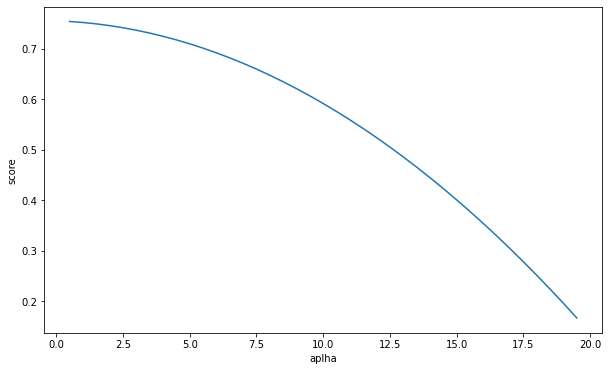

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(alphas, scores)
plt.xlabel("aplha")
plt.ylabel("score")

plt.show()

# Challenges: 

Once again we find that by increasing alpha for this dataset we're actually getting worse results, but that's not always the case.

Go back to where you trained your model, and change the random state from 42, to 12.

Do you get a different Outcome? 

**What next?**

A good approach would be to try k-folds cross validation to find the best value of alpha that works across multiple folds. 

However, you should be aware that there are only 20 observations in this dataset, so perhaps that's something I can leave you to circle back and try in the future with a larger dataset?


# Lasso Regression for Feature Selection

In [10]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_ 
lasso_coef

array([ 0.99196076,  0.        , -0.41809096])

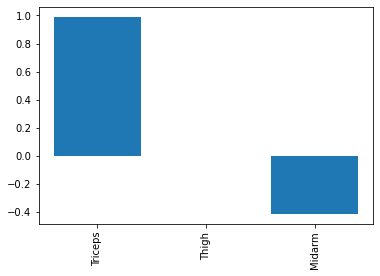

In [11]:
import matplotlib.pyplot as plt

column_names = bodyfat_df.drop("Bodyfat", axis=1).columns
plt.bar(column_names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

This chart shows that Triceps is the most import feature. 

It also shows that Lasso Regression (like Ridge Regression), doesn't shrink all features equally. 

The main difference between Ridge and Lasso Regression is that Lasso shrink some features to zero; whereas Ridge Regression can only shrink them close to zero. 

Essentially, this means that Lasso Regression is better at getting rid of useless features from your dataset. 

By contrast Ridge Regression tends to perform slightly better than Lasso if most features are useful. 

## Question

How does Lasso feature selection compare to analyzing using a Seaborn PairPlot as shown below? 

While Lasso Regression successfully identified that Triceps have a strong correlation to Bodyfat, it did less well with the Thigh and Midarm. Would you like to comment? 


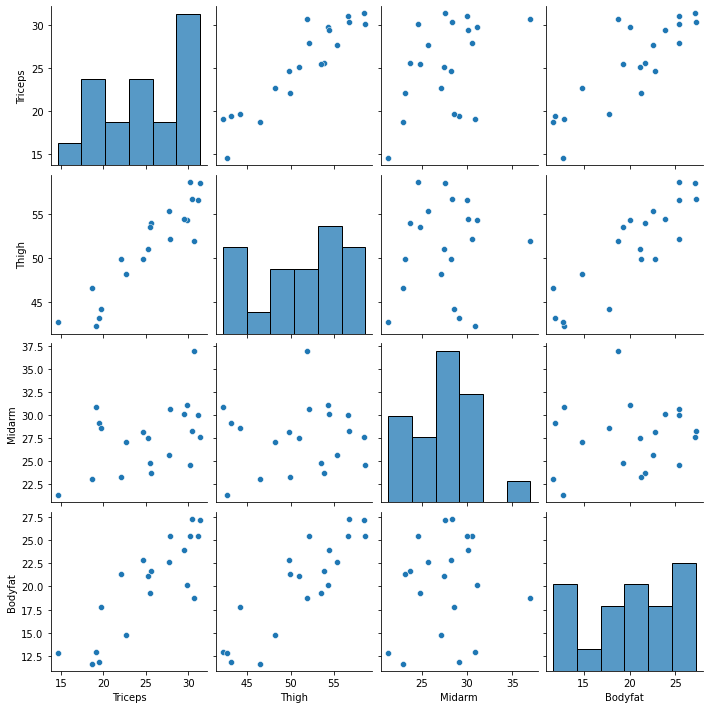

In [12]:
import seaborn as sns
sns.pairplot(bodyfat_df)

The chart above shows that Tricep thickness is the feature that has the greatest influence on the bodyfat. 

The medical profession often uses tricep skin thickness as a metric to measure obseity, so it seems likely they already know this. It's good that our data concur!

# Congratulations

## You know know how to Lasso!

![Lasso](../../Images/Lasso.png)


# Further Learning

StatQuest : Bias and Variance : https://www.youtube.com/watch?v=EuBBz3bI-aA 

StatQuest : Ridge Regression : https://www.youtube.com/watch?v=Q81RR3yKn30&t=288s 

StatQuest : Lasso Regression : https://www.youtube.com/watch?v=NGf0voTMlcs

Note: StatQuest denotes the penalty hyperparameter with $\lambda$ where we've used $\alpha$
